In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import csv
import re
from shapely.geometry import Point, Polygon

%matplotlib inline

In [7]:
li = []
for i in range(45):
    li.append('corona_tweets_'+str(9+i*7)+'.csv')
print(li)

['corona_tweets_9.csv', 'corona_tweets_16.csv', 'corona_tweets_23.csv', 'corona_tweets_30.csv', 'corona_tweets_37.csv', 'corona_tweets_44.csv', 'corona_tweets_51.csv', 'corona_tweets_58.csv', 'corona_tweets_65.csv', 'corona_tweets_72.csv', 'corona_tweets_79.csv', 'corona_tweets_86.csv', 'corona_tweets_93.csv', 'corona_tweets_100.csv', 'corona_tweets_107.csv', 'corona_tweets_114.csv', 'corona_tweets_121.csv', 'corona_tweets_128.csv', 'corona_tweets_135.csv', 'corona_tweets_142.csv', 'corona_tweets_149.csv', 'corona_tweets_156.csv', 'corona_tweets_163.csv', 'corona_tweets_170.csv', 'corona_tweets_177.csv', 'corona_tweets_184.csv', 'corona_tweets_191.csv', 'corona_tweets_198.csv', 'corona_tweets_205.csv', 'corona_tweets_212.csv', 'corona_tweets_219.csv', 'corona_tweets_226.csv', 'corona_tweets_233.csv', 'corona_tweets_240.csv', 'corona_tweets_247.csv', 'corona_tweets_254.csv', 'corona_tweets_261.csv', 'corona_tweets_268.csv', 'corona_tweets_275.csv', 'corona_tweets_282.csv', 'corona_tweet

In [6]:
# def generate_file_list(): #generate the raw file names for file concatenation before processing 
#     mondict = {1: "january", 2: "february", 3: "march", 4: "april", 5: "may", 6: "june",
#                7: "july", 8: "august", 9: "september", 10: "october", 11: "november", 12: "december"}
#     li = []
#     for key in mondict: 
#         i = 1
#         if key == 1 or key == 3 or key == 5 or key == 7 or key == 8 or key == 10 or key == 12:
#             while i < 31: 
#                 li.append(mondict[key]+str(i)+'_'+mondict[key]+str(i+1)+'.csv')
#                 i+=1
#             if i == 31: 
#                 li.append(mondict[key]+str(i)+mondict[key+1]+'1.csv')
          
#         if key == 4 or key == 6 or key == 9 or key == 11: 
#             while i < 30: 
#                 li.append(str(mondict[key])+str(i)+str(mondict[key])+str(i+1)+'.csv')
#                 i+=1
#             if i == 30: 
#                 li.append(str(mondict[key])+str(i)+str(mondict[key+1])+'1.csv')
        
#         if key == 2: 
#             while i < 28: 
#                 li.append(str(mondict[key])+str(i)+str(mondict[key])+str(i+1)+'.csv')
#                 i+=1
#             if i == 28: 
#                 li.append(str(mondict[key])+str(i)+str(mondict[key+1])+'1.csv')    
#     print(li)
#     return li
# rawli = generate_file_list()

rawli = ['march21_march22.csv', 'march22_march23.csv', 'march23_march24.csv', 'march24_march25.csv', 'march25_march26.csv', 'march26_march27.csv', 
'march27_march28.csv', 'march28_march29.csv', 'march30_march31.csv', 'march31_april1.csv', 'april1_april2.csv', 'april2_april3.csv', 'april3_april4.csv',
'april4_april5.csv', 'april5_april6.csv', 'april6_april7.csv', 'april7_april8.csv', 'april8_april9.csv', 'april9_april10.csv', 'april10_april11.csv', 
'april11_april12.csv', 'april12_april13.csv', 'april13_april14.csv', 'april14_april15.csv', 'april15_april16.csv', 'april16_april17.csv', 'april17_april18.csv', 
'april18_april19.csv', 'april19_april20.csv', 'april20_april21.csv', 'april21_april22.csv', 'april22_april23.csv', 'april23_april24.csv', 'april24_april25.csv', 
'april25_april26.csv', 'april26_april27.csv', 'april27_april28.csv', 'april28_april29.csv', 'april29_april30.csv', 'april30_may1.csv', 'may1_may2.csv', 'may2_may3.csv', 
'may3_may4.csv', 'may4_may5.csv', 'may5_may6.csv', 'may6_may7.csv', 'may7_may8.csv', 'may8_may9.csv', 'may9_may10.csv', 'may10_may11.csv', 'may11_may12.csv', 'may12_may13.csv',
'may13_may14.csv', 'may14_may15.csv', 'may15_may16.csv', 'may16_may17.csv', 'may17_may18.csv', 'may18_may19.csv', 'may19_may20.csv', 'may20_may21.csv', 'may21_may22.csv', 'may22_may23.csv', 
'may23_may24.csv', 'may24_may25.csv', 'may25_may26.csv', 'may26_may27.csv', 'may27_may28.csv', 'may28_may29.csv', 'may29_may30.csv', 'may30_may31.csv', 'may31_june1.csv', 'june1_june2.csv',
'june2_june3.csv', 'june3_june4.csv', 'june4_june5.csv', 'june5_june6.csv', 'june6_june7.csv', 'june7_june8.csv', 'june8_june9.csv', 'june9_june10.csv', 'june10_june11.csv', 'june11_june12.csv',
'june12_june13.csv', 'june13_june14.csv', 'june14_june15.csv', 'june15_june16.csv', 'june16_june17.csv', 'june17_june18.csv', 'june18_june19.csv', 'june19_june20.csv', 'june20_june21.csv', 'june21_june22.csv', 
'june22_june23.csv', 'june23_june24.csv', 'june24_june25.csv', 'june25_june26.csv', 'june26_june27.csv', 'june27_june28.csv', 'june28_june29.csv', 'june29_june30.csv', 'june30_july1.csv', 'july1_july2.csv',
'july2_july3.csv', 'july3_july4.csv', 'july4_july5.csv', 'july5_july6.csv', 'july6_july7.csv', 'july7_july8.csv', 'july8_july9.csv', 'july9_july10.csv', 'july10_july11.csv', 'july11_july12.csv', 
'july12_july13.csv', 'july13_july14.csv', 'july14_july15.csv', 'july15_july16.csv', 'july16_july17.csv', 'july17_july18.csv', 'july18_july19.csv', 'july19_july20.csv', 'july20_july21.csv', 
'july21_july22.csv', 'july22_july23.csv', 'july23_july24.csv', 'july24_july25.csv', 'july25_july26.csv', 'july26_july27.csv', 'july27_july28.csv', 'july28_july29.csv', 'july29_july30.csv',
'july30_july31.csv', 'july31_august1.csv', 'august1_august2.csv', 'august2_august3.csv', 'august3_august4.csv', 'august4_august5.csv', 'august5_august6.csv', 'august6_august7.csv', 'august7_august8.csv',
'august8_august9.csv', 'august9_august10.csv', 'august10_august11.csv', 'august11_august12.csv', 'august12_august13.csv', 'august13_august14.csv', 'august14_august15.csv', 'august15_august16.csv',
'august16_august17.csv', 'august17_august18.csv', 'august18_august19.csv', 'august19_august20.csv', 'august20_august21.csv', 'august21_august22.csv', 'august22_august23.csv', 'august23_august24.csv',
'august24_august25.csv', 'august25_august26.csv', 'august26_august27.csv', 'august27_august28.csv', 'august28_august29.csv', 'august29_august30.csv', 'august30_august31.csv', 'august31_september1.csv',
'september1_september2.csv', 'september2_september3.csv', 'september3_september4.csv', 'september4_september5.csv', 'september5_september6.csv', 'september6_september7.csv', 'september7_september8.csv', 
'september8_september9.csv', 'september9_september10.csv', 'september10_september11.csv', 'september11_september12.csv', 'september12_september13.csv', 'september13_september14.csv', 'september14_september15.csv', 
'september15_september16.csv', 'september16_september17.csv', 'september17_september18.csv', 'september18_september19.csv', 'september19_september20.csv', 'september20_september21.csv', 'september21_september22.csv',
'september22_september23.csv', 'september23_september24.csv', 'september24_september25.csv', 'september25_september26.csv', 'september26_september27.csv', 'september27_september28.csv', 'september28_september29.csv', 
'september29_september30.csv', 'september30_october1.csv', 'october1_october2.csv', 'october2_october3.csv', 'october3_october4.csv', 'october4_october5.csv', 'october5_october6.csv', 'october6_october7.csv', 'october7_october8.csv',
'october8_october9.csv', 'october9_october10.csv', 'october10_october11.csv', 'october11_october12.csv', 'october12_october13.csv', 'october13_october14.csv', 'october14_october15.csv', 'october15_october16.csv', 'october16_october17.csv', 
'october17_october18.csv', 'october18_october19.csv', 'october19_october20.csv', 'october20_october21.csv', 'october21_october22.csv', 'october22_october23.csv', 'october23_october24.csv', 'october24_october25.csv', 'october25_october26.csv',
'october26_october27.csv', 'october27_october28.csv', 'october28_october29.csv', 'october29_october30.csv', 'october30_october31.csv', 'october31_november1.csv', 'november1_november2.csv', 'november2_november3.csv', 
'november3_november4.csv', 'november4_november5.csv', 'november5_november6.csv', 'november6_november7.csv', 'november7_november8.csv', 'november8_november9.csv', 'november9_november10.csv', 'november10_november11.csv', 
'november11_november12.csv', 'november12_november13.csv', 'november13_november14.csv', 'november14_november15.csv', 'november15_november16.csv', 'november16_november17.csv', 'november17_november18.csv', 'november18_november19.csv', 
'november19_november20.csv', 'november20_november21.csv', 'november21_november22.csv', 'november22_november23.csv', 'november23_november24.csv', 'november24_november25.csv', 'november25_november26.csv', 'november26_november27.csv', 
'november27_november28.csv', 'november28_november29.csv', 'november29_november30.csv', 'november30_december1.csv', 'december1_december2.csv', 'december2_december3.csv', 'december3_december4.csv', 'december4_december5.csv',
'december5_december6.csv', 'december6_december7.csv', 'december7_december8.csv', 'december8_december9.csv', 'december9_december10.csv', 'december10_december11.csv', 'december11_december12.csv', 'december12_december13.csv', 
'december13_december14.csv', 'december14_december15.csv', 'december15_december16.csv', 'december16_december17.csv', 'december17_december18.csv', 'december18_december19.csv', 'december19_december20.csv', 'december20_december21.csv',
'december21_december22.csv', 'december22_december23.csv', 'december23_december24.csv', 'december24_december25.csv', 'december25_december26.csv', 'december26_december27.csv', 'december27_december28.csv', 'december28_december29.csv', 
'december29_december30.csv', 'december30_december31.csv', 'december31_january1.csv', 'january1_january2.csv', 'january2_january3.csv', 'january3_january4.csv', 'january4_january5.csv', 'january5_january6.csv', 'january6_january7.csv', 
'january7_january8.csv', 'january8_january9.csv', 'january9_january10.csv', 'january10_january11.csv', 'january11_january12.csv', 'january12_january13.csv', 'january13_january14.csv', 'january14_january15.csv', 'january15_january16.csv',
'january16_january17.csv', 'january17_january18.csv', 'january18_january19.csv'] 


In [7]:
df_list = [] #list of dfs for raw csvs from the IEEE source
df_master = pd.DataFrame() #empty master dataframe
for raw in rawli:
    df_raw = pd.read_csv('geodata/'+raw, names=['id','sentiment_score'])
    df_master = pd.concat([df_master,df_raw], axis=0)

df_ID = df_master['id']
#df_master.to_csv(r'master Mar to Jan.csv', index=False, header=None)
#df_ID.to_csv(r'ID only in January.csv', index=False, header=None)
print(df_ID.shape)

#concatenate the hydrated files into a master_hydrated file
hydrateli = ['hydrate March.csv', 'hydrate April.csv','hydrate May.csv','hydrate June.csv','hydrate July.csv','hydrate August.csv','hydrate September.csv','hydrate October.csv','hydrate November.csv','hydrate December.csv','hydrate January.csv']
df_master_hydrated = pd.DataFrame()
for hydrated in hydrateli:
    df_hydrate = pd.read_csv('geodata/'+hydrated, low_memory=False, header = 0)
    df_master_hydrated = pd.concat([df_master_hydrated, df_hydrate], axis=0)

#df_master_hydrated.to_csv(r'master hydrated Mar to Jan.csv', index=False, header=None)

(299888,)


In [54]:
#left join to add a sentiment column to the hydrated df using unique tweeter ids
df_merge = df_master_hydrated.merge(df_master, on='id', how='left')
print (df_merge.shape)

count = df_merge['text'].str.contains("vaccine").sum()
print(count)

vaccine_df = df_merge[df_merge['text'].str.contains("vaccine")]
#print(list(vaccine_df['text']))

(281871, 35)
3868


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,sentiment_score
164,"77.39760968,28.51873311",Sat Mar 21 08:19:23 +0000 2020,NaN,NaN,https://www.instagram.com/p/B9_R1nApimL/?igshi...,0,1241278215445819392,NaN,NaN,NaN,...,1,0,"New Delhi, India",Digital Kaushal @Stingo,kaushal04756250,39,NaN,http://www.delvetech.co.in,False,0.000000
1462,"-80.13934722,26.12700768",Sun Mar 22 15:52:45 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-CqhTeBNDV/?igshi...,0,1241754699956719616,NaN,NaN,NaN,...,638,12,Fort Lauderdale,Double A,doubleageo,5224,NaN,http://AATAXCO.com,False,0.000000
3716,"-79.16659,43.77102",Tue Mar 24 22:24:59 +0000 2020,nigeria mrjollof covid_19 corona coronavirus s...,NaN,https://www.instagram.com/p/B-IgmGbFv21/?igshi...,0,1242578183561633796,NaN,NaN,NaN,...,732,0,"Canada, Toronto",Talkcityonline,Talkcityonline,6509,NaN,http://Talkcityonline.com,False,0.350000
3833,"-73.87320303,50.42075843",Wed Mar 25 00:59:01 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-Iyn4jDRmP/?igshi...,0,1242616946677481472,NaN,NaN,NaN,...,873,2,"Mistissini, QC, CA",Jew-b-al,Gordjewbal,1486,NaN,https://soundcloud.com/jew-b-al,False,-0.400000
4326,"110.366643,-7.799243",Wed Mar 25 15:47:40 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-KYUdRH2YTgQRI-Cy...,0,1242840584412434432,NaN,NaN,NaN,...,270,1,"Baturaden, Indonesia",AndriPramuntadi,andritadi,2885,NaN,NaN,False,0.116667


In [9]:
#vaccine_df = pd.read_csv('vaccine dataset.csv', lineterminator='\n', low_memory=False, header = 0)
vaccine_df.iloc[:, 0] = vaccine_df.iloc[:, 0].str.lstrip('\n') 
#print(vaccine_df.head(5))

tweet_df = vaccine_df[['coordinates','text','sentiment_score']]
tweet_df = tweet_df[~tweet_df.text.str.contains('RT')]
tweet_df = tweet_df.replace('\n',' ', regex=True)
tweet_df

/Users/cathy/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,coordinates,text,sentiment_score
164,"77.39760968,28.51873311",Corona Virus Precaution : currently no vaccin...,0.000000
1462,"-80.13934722,26.12700768","If corona is a cure for this virus, doctors co...",0.000000
3716,"-79.16659,43.77102",Apparently Nigerians most prominent herbal doc...,0.350000
3833,"-73.87320303,50.42075843","The virus is in the vaccine, corona virus is j...",-0.400000
4326,"110.366643,-7.799243",Earthvolution Is time where earth need to clea...,0.116667
...,...,...,...
281791,"-73.56725453,45.75975883",Fighting Stigma: Pubs could remain shut until ...,0.000000
281795,"-123.12316786,49.3158291",AMGMT — Colorado taskforce offers free vaccine...,0.027778
281834,"-81.9375,34.9535","4 months and 2000 miles to get home, well wort...",0.275000
281856,"-73.56725453,45.75975883",Fighting Stigma: Covid vaccine rollout will pr...,0.100000


In [79]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions
    
    def lower(self, tweet):
        return tweet.lower()
    
    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)
    
    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)
    
    def remove_url(self,tweet):
        return re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', tweet)

    def deemojify(self, tweet):
        regrex_pattern = re.compile(pattern = "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
        return regrex_pattern.sub(r'',tweet)
    
    def preprocess_tweet(self, tweet):
        tweet = self.lower(tweet)
        tweet = self.expand(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        tweet = self.deemojify(tweet)
        tweet = self.remove_url(tweet)
        return tweet

contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

contractionsWithAnotherInvertedComma = { 
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

pp_class = preprocess(tweet_df, contractions, contractionsWithAnotherInvertedComma)
tweet_df['text'] = tweet_df['text'].apply(lambda x : pp_class.preprocess_tweet(x))


In [80]:
tweet_df

,coordinates,text,sentiment_score,longitude,latitude,geometry
164,"77.39760968,28.51873311",corona virus precaution currently no vaccin...,0.000000,77.39760968,28.51873311,POINT (77.39761 28.51873)
1462,"-80.13934722,26.12700768",if corona is a cure for this virus doctors co...,0.000000,-80.13934722,26.12700768,POINT (-80.13935 26.12701)
3716,"-79.16659,43.77102",apparently nigerians most prominent herbal doc...,0.350000,-79.16659,43.77102,POINT (-79.16659 43.77102)
3833,"-73.87320303,50.42075843",the virus is in the vaccine corona virus is j...,-0.400000,-73.87320303,50.42075843,POINT (-73.87320 50.42076)
4326,"110.366643,-7.799243",earthvolution is time where earth need to clea...,0.116667,110.366643,-7.799243,POINT (110.36664 -7.79924)
...,...,...,...,...,...,...
281791,"-73.56725453,45.75975883",fighting stigma pubs could remain shut until ...,0.000000,-73.56725453,45.75975883,POINT (-73.56725 45.75976)
281795,"-123.12316786,49.3158291",amgmt — colorado taskforce offers free vaccine...,0.027778,-123.12316786,49.3158291,POINT (-123.12317 49.31583)
281834,"-81.9375,34.9535",4 months and 2000 miles to get home well wort...,0.275000,-81.9375,34.9535,POINT (-81.93750 34.95350)
281856,"-73.56725453,45.75975883",fighting stigma covid vaccine rollout will pr...,0.100000,-73.56725453,45.75975883,POINT (-73.56725 45.75976)


In [90]:
new = tweet_df["coordinates"].str.split(",", n = 1, expand = True) 
tweet_df["longitude"]= new[0]
tweet_df["latitude"]= new[1]
tweet_df

,coordinates,text,sentiment_score,longitude,latitude,geometry
164,"77.39760968,28.51873311",corona virus precaution currently no vaccin...,0.000000,77.39760968,28.51873311,POINT (77.39761 28.51873)
1462,"-80.13934722,26.12700768",if corona is a cure for this virus doctors co...,0.000000,-80.13934722,26.12700768,POINT (-80.13935 26.12701)
3716,"-79.16659,43.77102",apparently nigerians most prominent herbal doc...,0.350000,-79.16659,43.77102,POINT (-79.16659 43.77102)
3833,"-73.87320303,50.42075843",the virus is in the vaccine corona virus is j...,-0.400000,-73.87320303,50.42075843,POINT (-73.87320 50.42076)
4326,"110.366643,-7.799243",earthvolution is time where earth need to clea...,0.116667,110.366643,-7.799243,POINT (110.36664 -7.79924)
...,...,...,...,...,...,...
281791,"-73.56725453,45.75975883",fighting stigma pubs could remain shut until ...,0.000000,-73.56725453,45.75975883,POINT (-73.56725 45.75976)
281795,"-123.12316786,49.3158291",amgmt — colorado taskforce offers free vaccine...,0.027778,-123.12316786,49.3158291,POINT (-123.12317 49.31583)
281834,"-81.9375,34.9535",4 months and 2000 miles to get home well wort...,0.275000,-81.9375,34.9535,POINT (-81.93750 34.95350)
281856,"-73.56725453,45.75975883",fighting stigma covid vaccine rollout will pr...,0.100000,-73.56725453,45.75975883,POINT (-73.56725 45.75976)


In [82]:
gdf = geopandas.GeoDataFrame(tweet_df, geometry=geopandas.points_from_xy(tweet_df.longitude, tweet_df.latitude))
print(gdf.head())

                   coordinates  \
164    77.39760968,28.51873311   
1462  -80.13934722,26.12700768   
3716        -79.16659,43.77102   
3833  -73.87320303,50.42075843   
4326      110.366643,-7.799243   

                                                   text  sentiment_score  \
164   corona virus precaution    currently no vaccin...         0.000000   
1462  if corona is a cure for this virus  doctors co...         0.000000   
3716  apparently nigerians most prominent herbal doc...         0.350000   
3833  the virus is in the vaccine  corona virus is j...        -0.400000   
4326  earthvolution is time where earth need to clea...         0.116667   

         longitude     latitude                    geometry  
164    77.39760968  28.51873311   POINT (77.39761 28.51873)  
1462  -80.13934722  26.12700768  POINT (-80.13935 26.12701)  
3716     -79.16659     43.77102  POINT (-79.16659 43.77102)  
3833  -73.87320303  50.42075843  POINT (-73.87320 50.42076)  
4326    110.366643    -7.799

In [83]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# world

In [84]:
wmap = gpd.read_file('ne_10m_admin_0_countries.shp')

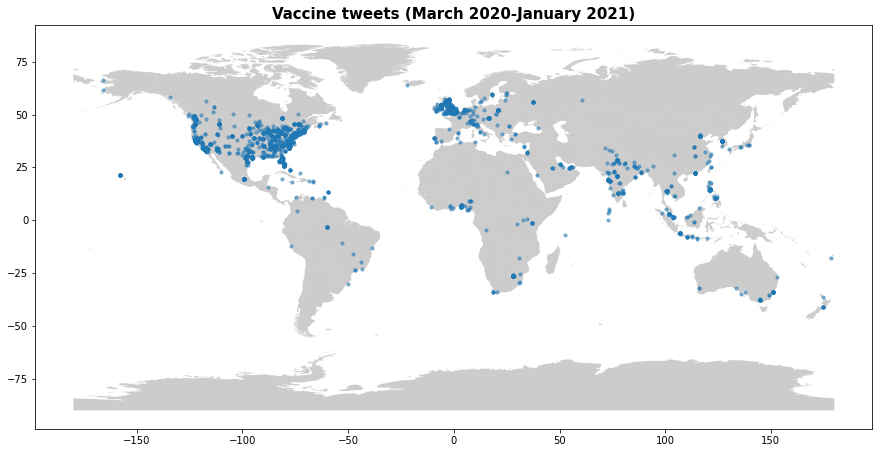

In [85]:
fig, ax = plt.subplots(figsize=(15,15))
wmap.plot(ax=ax, alpha=0.4,color='grey')
gdf.plot(ax=ax,alpha=0.5,markersize=10)
plt.title('Vaccine tweets (March 2020-January 2021)', fontsize=15,fontweight='bold')
plt.show()

In [86]:
from wordcloud import WordCloud, STOPWORDS

There are 729573 words in the combination of all review.


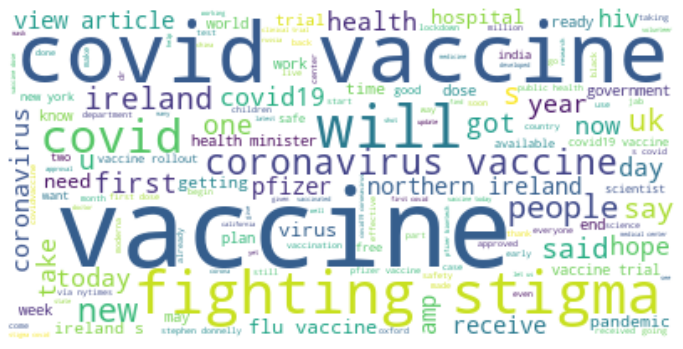

In [92]:
text = " ".join(tweet for tweet in  tweet_df.text)
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#bigstring = tweet_df['text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
# plt.figure(figsize=(12,12))
# wordcloud = WordCloud(stopwords=STOPWORDS,
#                           background_color='white',
#                           collocations=False,
#                           width=1200,
#                           height=1000
#                          ).generate(bigstring)
# plt.axis('off')
# plt.imshow(wordcloud)

references: 
    https://geopandas.org/gallery/create_geopandas_from_pandas.html
    https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391